In [361]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [362]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util,correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

<module 'R2h_module' from '/home/sebouh/di-hadron/R2h_module.py'>

In [363]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

mixtag='xQ2_'
dfs_mixed = {a : root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb GiBUU_D GiBUU_C GiBUU_Fe GiBUU_Pb".split()}
#dfs_mixed = {a : root_pandas.read_root(f"/home/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}

In [364]:
directory = "."
dfs_data = {a : root_pandas.read_root(f"{directory}/Data_Pairs_%s.root" %a.replace("D_",""),a) for a in "D_C C D_Fe Fe Pb D_Pb".split()}

print(dfs_data["D_C"].columns)
dfs_trigger = {a : root_pandas.read_root(f"{directory}/Data_Pairs_%s.root" %a.replace("D_",""),a+"_trigger") for a in "D_C C D_Fe Fe Pb D_Pb".split()}



Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py',
       'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20',
       'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th',
       'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector',
       'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus',
       'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC',
       'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'run'],
      dtype='object')


In [56]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print (' trigger')
    dfs_trigger['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), 
                                                           '%s_trigger'%target)
    print (' pairs')
    dfs_data['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), target)
print (dfs_trigger.keys())

D
 trigger
 pairs
C
 trigger
 pairs
Fe
 trigger
 pairs
Pb
 trigger
 pairs
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb'])


In [57]:
print(set(dfs_data['GiBUU_C'].h2_pid))

{211, 2212, -211}


In [58]:

#now load MC
#dfs_data.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a) for a in "Pb D C Fe".split()})




In [59]:
#dfs_trigger.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a + "_trigger") for a in "Pb D C Fe".split()})



In [407]:
for dct in dfs_mixed,dfs_data, dfs_trigger:
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])
    print(dct.keys())

dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D'])
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'D'])
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'D'])


In [61]:
for df in dfs_data.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)
        df['h2_FidCutPiPlus'] = [1]*len(df)
for df in dfs_mixed.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)
        df['h2_FidCutPiPlus'] = [1]*len(df)
for df in dfs_trigger.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)

In [62]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_data.keys()):
    isMC=False
    if 'GiBUU' in key:
        isMC=True
    
    if '_2pi' in key or '_pi_p' in key:
        continue
    print(f"\n\n{key}")
    if key in dfs_mixed.keys() and 'dphi' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)
        dfs_mixed[key].eval(f'dphi = abs(diff_phi_cm)', inplace=True)
    
    if key in dfs_mixed.keys():# and 'drap' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('h1_e=nu*h1_z',inplace=True)
        dfs_mixed[key].eval('h2_e=nu*h2_z',inplace=True)
        dfs_mixed[key].eval(f'drap=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
        #dfs_mixed[key].eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    data_trigger_cuts = dfs_data[key]#R2h_module.applyCuts(dfs_data[key],nomCuts=True)
    #if key in dfs_mixed.keys():
    #    mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key],nomCuts=True)
    if key in dfs_mixed.keys():
        mixed_trigger_cuts = dfs_mixed[key]
    #print(mixed_trigger_cuts)
    dfs_data[key + '_2pi'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
    dfs_data[key + '_pi_p'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=True, minPt=np.sqrt(0.005))
    dfs_trigger[key] = R2h_module.applyCuts(dfs_trigger[key],name='default',isMC=isMC,isTrigger=True,
                                 nomCuts=True, minPt=np.sqrt(0.005))
    if key in dfs_mixed.keys():
        mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key])    
        dfs_mixed[key + '_2pi'] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                                 nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
        dfs_mixed[key + '_pi_p'] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                                 nomCuts=True,h2Proton=True, minPt=np.sqrt(0.005))
    
    #for df in (dfs_data[key + '_2pi'],dfs_data[key + '_pi_p']):
    #    df.eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    #    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)



D_C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
secondary hadrons are pions 1177886  (82.15  %)
(h1_p+h2_p)/nu<1.0 1042162  (88.48  %)
(h1_pid*h2_pid)<0, opposite charge pions 503306  (48.29  %)
kinematic limits for h2_z 495163  (98.38  %)
kinematic limits for dphi 494693  (99.91  %)
kinematic limits for pair_mass 462961  (93.59  %)
leading hadrons are pions 144176  (31.14  %)
0.2<h2_p<5.0 144176  (100.00  %)
0.2<h1_p<5.0 144176  (100.00  %)
px in gamma* frame is <0.4 GeV 135987  (94.32  %)
pt>0.07071067811865475 GeV 131996  (97.07  %)
px in gamma* frame is <0.4 GeV 131996  (100.00  %)
10<h2_th<90 131901  (99.93  %)
Theta/P fiducial region selected for secondary hadron 131901  (100.00  %)
10< h1_th<90 131901  (100.00  %)
Theta/P fiducial region selected for trigger hadron 131901  (100.00  %)
Nom cuts for the pair applied (pi pi) 47883  (36.30  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0

1.0< Q2 <4.0 2114873  (100.00  %)
2.2 < nu < 4.2 2085841  (98.63  %)
secondary hadrons are protons 374044  (17.93  %)
leading hadrons are pions 241649  (64.60  %)
0.2<h2_p<5.0 241546  (99.96  %)
0.2<h1_p<5.0 241535  (100.00  %)
px in gamma* frame is <0.4 GeV 228173  (94.47  %)
pt>0.07071067811865475 GeV 220190  (96.50  %)
px in gamma* frame is <0.4 GeV 220190  (100.00  %)
10<h2_th<90 219926  (99.88  %)
Theta/P fiducial region selected for secondary hadron 219926  (100.00  %)
10< h1_th<90 219926  (100.00  %)
Theta/P fiducial region selected for trigger hadron 219926  (100.00  %)
Nom cuts for the pair applied (pi p) 66899  (30.42  %)
Entries before cut  4462608
Q2>1.0 and Q2<4.0 4462608  (100.00  %)
0.2<h1_p<5.0  4459167  (99.92  %)
inelasticity < 0.85 4459167  (100.00  %)
h1_pid = pions (trigger) 1372417  (30.78  %)
2.2 < nu <4.2 1354502  (98.69  %)
px in gamma* frame is <0.4 GeV 1291512  (95.35  %)
pt>0.07071067811865475 GeV 1261265  (97.66  %)
10< h1_th<90 1261263  (100.00  %)
Theta/P

1.0< Q2 <4.0 859360  (100.00  %)
2.2 < nu < 4.2 846060  (98.45  %)
secondary hadrons are pions 368028  (43.50  %)
(h1_p+h2_p)/nu<1.0 335480  (91.16  %)
(h1_pid*h2_pid)<0, opposite charge pions 138086  (41.16  %)
kinematic limits for h2_z 137602  (99.65  %)
kinematic limits for dphi 137542  (99.96  %)
kinematic limits for pair_mass 135951  (98.84  %)
leading hadrons are pions 135951  (100.00  %)
0.2<h2_p<5.0 135951  (100.00  %)
0.2<h1_p<5.0 135951  (100.00  %)
px in gamma* frame is <0.4 GeV 125923  (92.62  %)
pt>0.07071067811865475 GeV 122949  (97.64  %)
px in gamma* frame is <0.4 GeV 122949  (100.00  %)
10<h2_th<90 122177  (99.37  %)
Theta/P fiducial region selected for secondary hadron 122177  (100.00  %)
10< h1_th<90 122160  (99.99  %)
Theta/P fiducial region selected for trigger hadron 122160  (100.00  %)
Nom cuts for the pair applied (pi pi) 56124  (45.94  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 859360  (100.00  %)
2.2 < nu < 4.2 846060  (98.45  %)
second

pt>0.07071067811865475 GeV 763245  (95.05  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 2225228  (99.96  %)
2.2 < nu < 4.2 2125385  (95.51  %)
secondary hadrons are protons 926918  (43.61  %)
leading hadrons are pions 926918  (100.00  %)
0.2<h2_p<5.0 926918  (100.00  %)
0.2<h1_p<5.0 926918  (100.00  %)
px in gamma* frame is <0.4 GeV 812493  (87.66  %)
pt>0.07071067811865475 GeV 779426  (95.93  %)
Entries before cut  2011729
Q2>1.0 and Q2<4.0 2010807  (99.95  %)
0.2<h1_p<5.0  2010807  (100.00  %)
inelasticity < 0.85 2010807  (100.00  %)
h1_pid = pions (trigger) 2010807  (100.00  %)
2.2 < nu <4.2 1936249  (96.29  %)
px in gamma* frame is <0.4 GeV 1720887  (88.88  %)
pt>0.07071067811865475 GeV 1681417  (97.71  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 6925114  (99.96  %)
2.2 < nu < 4.2 6660684  (96.18  %)
secondary hadrons are pions 4521181  (67.88  %)
(h1_p+h2_p)/nu<1.0 3480911  (76.99  %)
(h1_pid*h2_pid)<0, opposite charge pions 1751912  (50.33

10< h1_th<90 3425746  (100.00  %)
Theta/P fiducial region selected for trigger 3425746  (100.00  %)
Nom cuts for the trigger applied 1541032  (44.98  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 10352599  (100.00  %)
2.2 < nu < 4.2 10218519  (98.70  %)
secondary hadrons are pions 7393655  (72.36  %)
(h1_p+h2_p)/nu<1.0 6430339  (86.97  %)
(h1_pid*h2_pid)<0, opposite charge pions 2496640  (38.83  %)
kinematic limits for h2_z 2482535  (99.44  %)
kinematic limits for dphi 2481345  (99.95  %)
kinematic limits for pair_mass 2465933  (99.38  %)
leading hadrons are pions 2465933  (100.00  %)
0.2<h2_p<5.0 2465933  (100.00  %)
0.2<h1_p<5.0 2465933  (100.00  %)
px in gamma* frame is <0.4 GeV 2340533  (94.91  %)
pt>0.07071067811865475 GeV 2281158  (97.46  %)
px in gamma* frame is <0.4 GeV 2281158  (100.00  %)
10<h2_th<90 2277173  (99.83  %)
Theta/P fiducial region selected for secondary hadron 2277173  (100.00  %)
10< h1_th<90 2277170  (100.00  %)
Theta/P fiducial region sele

In [63]:
dfs_mc= {f"{a}_2pi":root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_{a}.root",a) for a in "C Fe Pb".split()}
dfs_mc["D_2pi"] = root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")

In [64]:
#binning info
yrange_dfdy =(0,3)
bins_dfdy = (6,8)
#yrange_dfdy =(-0,3.5)
#bins_dfdy = (7,8)

In [65]:
for a in 'D C Fe Pb'.split():
    for x in "Q2 nu nu/5.014 W".split():
        print(a, x, "%.2f"%np.mean(dfs_data[a+"_2pi"].eval(x)))

D Q2 1.59
D nu 3.24
D nu/5.014 0.65
D W 2.31
C Q2 1.61
C nu 3.28
C nu/5.014 0.65
C W 2.32
Fe Q2 1.61
Fe nu 3.28
Fe nu/5.014 0.65
Fe W 2.32
Pb Q2 1.61
Pb nu 3.30
Pb nu/5.014 0.66
Pb W 2.33


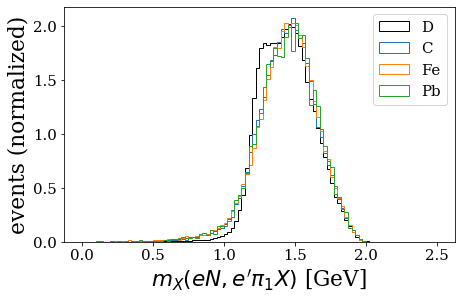

In [67]:
colors='k tab:blue tab:orange tab:green'.split()
targets = 'D C Fe Pb'.split()
for a,c in zip(targets,colors):
    df = dfs_data[a+"_2pi"]
    plt.hist(df.mx_eh1x, density=True,bins=100,histtype='step',label=a,color=c,range=(0,2.5))
plt.legend()
plt.xlabel("$m_X(eN,e'\pi_1X)$ [GeV]")
plt.ylabel("events (normalized)")
plt.savefig("images/mx_eh1x.png")    

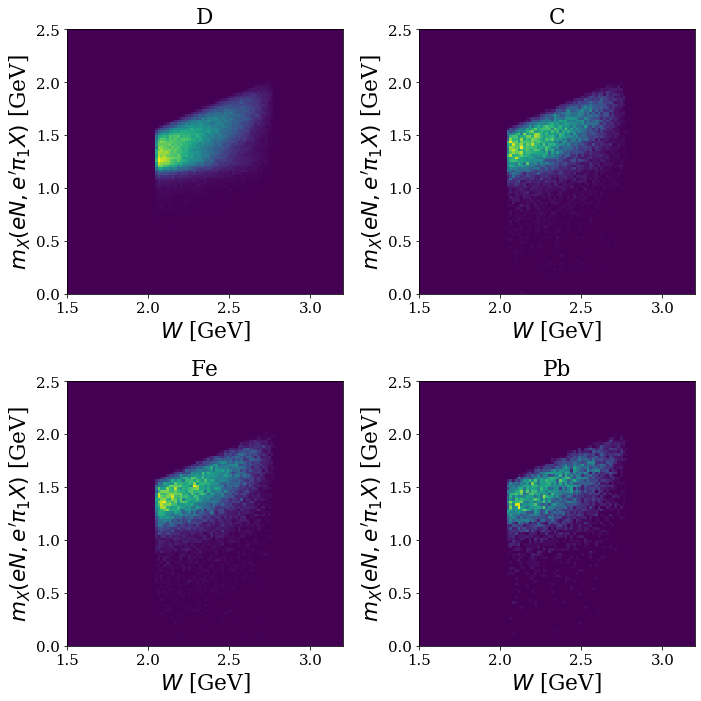

In [68]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))
colors='k tab:blue tab:orange tab:green'.split()
targets = 'D C Fe Pb'.split()
for a,c,i in zip(targets,colors, range(4)):
    df = dfs_data[a+"_2pi"]
    plt.sca(axs[i//2][i%2])
    plt.title(a)
    plt.hist2d(df.W,df.mx_eh1x, density=True,bins=100,range=((1.5, 3.2),(0,2.5)))

    plt.ylabel("$m_X(eN,e'\pi_1X)$ [GeV]")
    plt.xlabel("$W$ [GeV]")
plt.tight_layout()
plt.savefig("images/mx_eh1x_W.png") 

In [ ]:


good_runs_Pb = [41762 , 41763 , 41765 , 41766 , 41767 , 41771 , 41772 , 41773 , 41774 , 41775 ,
41776 , 41777 , 41778 , 41779 , 41780 , 41790 , 41791 , 41802 , 41803 , 41804 ,
41805 , 41808 , 41809 , 41810 , 41811 , 41812 , 41813 , 41814 , 41815 , 41816 ,
41817 , 41818 , 41819 , 41820 , 41821 , 41822 , 41823 , 41824 , 41825 , 41826 ,
41827 , 41828 , 41829 , 41830 , 41831 , 41832 , 41833 , 41835 , 41836 , 41837 ,
41838 , 41839 , 41841 , 41842 , 41843 , 41844 , 41845 , 41846 , 41847 , 41848 ,
41862 , 41863 , 41864 , 41865 , 41866 , 41867 , 41868 , 41869 , 41870 , 41871 , 
41872 , 41873 , 41874 , 41875 , 41876 , 41877 , 41878 , 41879 , 41880 , 41881 ,
41883 , 41884 , 41885 , 41886 , 41887 , 41888 , 41889 , 41890 , 41891 , 41892 , 
41893 , 41896 , 41897 , 41898 , 41899 , 41900 , 41901 , 41902 , 41903 , 41906 , 
41907 , 41908 , 41910 , 41911 , 41912 , 41913 , 41914 , 41915 , 41916 , 41917 , 
41918 , 41920 , 41928 , 41929 , 41930 , 41931 , 41932 , 41933 , 41934 , 41935 ,
41936 , 41937 , 41938 , 41939 , 41940 , 41941 , 41942 , 41943 , 41952 , 41953 , 
41954 , 41955 , 41956 , 41957 , 41958 , 41959 , 41960 , 41961 , 41962 , 41963 , 
41965 , 41966 , 41967 , 41968 , 41969 , 41970 , 41971 , 41972 , 41973 , 41974 , 
41975 , 41976 , 41977 , 41981 , 41982 , 41983 , 41984 , 41985 , 41986 , 41987 ,
41988 , 41989 , 41990 , 41991 , 41992 , 41993 , 41994 , 41995 , 41996 ]

good_runs_Fe = [41146 , 41147 , 41148 , 41149 , 41150 , 41153 , 41155 , 41158 , 41159 , 41161 ,
41163 , 41164 , 41165 , 41166 , 41167 , 41168 , 41170 , 41171 , 41172 , 41173 ,
41174 , 41175 , 41176 , 41177 , 41178 , 41179 , 41180 , 41181 , 41182 , 41184 ,
41188 , 41189 , 41192 , 41197 , 41199 , 41200 , 41205 , 41206 , 41207 , 41208 ,
41209 , 41210 , 41211 , 41212 , 41213 , 41214 , 41218 , 41220 , 41222 , 41235 ,
41236 , 41239 , 41240 , 41241 , 41243 , 41244 , 41245 , 41247 , 41248 , 41249 ,
41252 , 41256 , 41258 , 41259 , 41260 , 41261 , 41262 , 41263 , 41264 , 41265 ,
41266 , 41267 , 41268 , 41269 , 41270 , 41271 , 41272 , 41273 , 41276 , 41285 ,
41286 , 41287 , 41288 , 41289 , 41290 , 41291 , 41292 , 41293 , 41294 , 41295 ,
41296 , 41297 , 41298 , 41299 , 41300 , 41301 , 41302 , 41306 , 41314 , 41316 ,
41317 , 41318 , 41319 , 41320 , 41321 , 41322 , 41325 , 41326 , 41327 , 41328 ,
41331 , 41332 , 41335 , 41336 , 41337 , 41338 , 41339 , 41340 , 41341 , 41344 ,
41345 , 41346 , 41347 , 41348 , 41349 , 41350 , 41351 , 41352 , 41353 , 41354 ,
41355 , 41356 , 41357 , 41358 , 41359 , 41360 , 41361 , 41362 , 41363 , 41364 ,
41365 , 41366 , 41368 , 41369 , 41370 , 41371 , 41372 , 41373 , 41376 , 41377 ,
41379 , 41382 , 41383 , 41384 , 41385 , 41386 , 41388 , 41389 , 41391 , 41392 ,
41393 , 41395 , 41398 , 41399 , 41400 , 41402 , 41403 , 41405 , 41406 , 41407 ,
41408 , 41409 , 41410 , 41413 , 41414 , 41415 , 41416 , 41417 , 41419 , 41420 ,
41421 , 41424 , 41425 , 41426 , 41428 , 41429 , 41436 , 41442 , 41443 , 41444 ,
41445 , 41446 , 41447 , 41450 , 41451 , 41452 , 41453 , 41454 , 41455 , 41457 ,
41458 , 41459 , 41460 , 41461 , 41465 , 41466 , 41467 , 41468 , 41469 , 41470 ,
41471 , 41472 , 41473 , 41474 , 41475 , 41476 , 41478 , 41479 , 41482 , 41483 ,
41490 , 41492 , 41493 , 41496 , 41497 , 41498 , 41499 , 41500 , 41501 , 41502 , 
41503 , 41504 , 41505 , 41509 , 41512 , 41513 , 41514 , 41515 , 41516 , 41517 ,
41518 , 41519 , 41520 , 41521 , 41524 , 41525 , 41526 , 41527 , 41528 , 41529 ,
41531 , 41532 , 41533 , 41535 , 41536 , 41537 , 41538 , 41539 , 41540 , 41541 , 
41542 , 41543 ]

good_runs_C = [42011  ,  42012  ,  42013   ,   42014  ,  42015  ,  42016    ,  42017   ,  42022  , 42024   ,   42025  ,  42026  ,  42027  ,  42028  ,  42029    ,  42030   ,   42031  , 42032  ,  42033   ,  42034  ,  42037  ,  42038   ,   42039  ,  42041  ,  42042  ,  42043  ,  42044  ,  42047   ,   42048  ,  42049  ,  42050   ,  42051  ,  42052  , 42053   ,   42054  ,  42055  ,  42056  , 42057  ,   42058  ,  42059   ,   42060  ,
42061  ,  42062   , 42063  ,  42064  ,  42065   ,   42066  ,  42067  ,  42068 , 42069  ,  42070  ,
42071   ,   42072  ,  42073  ,  42074  ,  42075  ,  42076  , 42077   ,   42078  ,  42079  ,  42080  ,
42081  ,  42082  ,  42083   ,   42084  , 42085  ,  42086  ,  42087  ,  42088  ,  42089   ,   42090  ,
42097  ,  42098  , 42099  ,  42100  ,  42101   ,   42102  ,  42103  ,  42104  ,  42105  ,  42106  ,
42107   ,   42108  ,  42109  ,  42111  ,  42112  ,  42113  ,  42114   ,   42115  , 42116  ,  42117   ,
42118  ,  42119  ,  42120   ,   42121  ,  42122  ,  42123  , 42124  ,  42125  ,  42126   ,   42127  ,
42128  ,  42129   , 42130  ,  42131  , 42132   ,   42133  ,  42134  ,  42135  ,  42136  ,  42137  ,
42138   ,   42139  , 42141  ,  42142   , 42143  ,  42144  ,  42145   ,   42146 ]

In [279]:
runs_on_file = list(sorted(set([int(fn.split("_")[-2]) for fn in glob.glob(f"/home/seba/di-hadron/data/fe/*.root")])))
print(runs_on_file)
runs_on_file2 = list(sorted(set([int(fn.split("_")[-2]) for fn in glob.glob(f"/home/sebouh/fe_firsthalf/*.root")])))
print(runs_on_file2)

for r in good_runs_Fe:
    if r not in runs_on_file+runs_on_file2:
        print(r, "not found")

[41146, 41147, 41148, 41149, 41150, 41153, 41155, 41158, 41159, 41161, 41163, 41164, 41165, 41166, 41167, 41168, 41169, 41170, 41171, 41172, 41173, 41174, 41175, 41176, 41177, 41178, 41179, 41260, 41270, 41285, 41286, 41287, 41288, 41289, 41290, 41291, 41292, 41293, 41294, 41295, 41296, 41297, 41298, 41299, 41300, 41301, 41302, 41306, 41314, 41315, 41316, 41317, 41318, 41319, 41320, 41321, 41322, 41325, 41326, 41327, 41328, 41331, 41332, 41335, 41336, 41337, 41338, 41339, 41340, 41341, 41344, 41345, 41346, 41347, 41348, 41349, 41350, 41351, 41352, 41353, 41354, 41355, 41356, 41357, 41358, 41359, 41360, 41361, 41362, 41363, 41364, 41365, 41366, 41368, 41369, 41370, 41371, 41372, 41373, 41376, 41377, 41379, 41382, 41383, 41384, 41385, 41386, 41387, 41388, 41389, 41391, 41392, 41393, 41394, 41395, 41398, 41399, 41400, 41402, 41403, 41405, 41406, 41407, 41408, 41409, 41410, 41413, 41414, 41415, 41416, 41417, 41419, 41420, 41421, 41424, 41425, 41426, 41428, 41429, 41436, 41442, 41443, 41444

/home/seba/di-hadron/data/ca/N_clas_42111_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42089_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42078_18.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42066_16.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42106_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42084_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42109_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42088_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42107_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42071_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42012_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42115_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42107_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42031_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42052_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42129_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42068_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42014_21.pas

/home/seba/di-hadron/data/ca/N_clas_42034_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42066_02.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42112_03.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42143_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42085_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42113_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42052_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42107_23.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42085_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42103_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42086_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42031_22.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42119_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42060_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42145_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42115_18.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42039_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42135_10.pas

/home/seba/di-hadron/data/ca/N_clas_42025_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42087_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42013_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42060_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42145_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42119_16.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42071_22.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42078_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42116_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42034_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42088_03.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42125_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42031_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42034_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42011_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42089_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42084_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42080_00.pas

/home/seba/di-hadron/data/ca/N_clas_42137_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42085_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42127_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42125_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42141_03.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42039_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42084_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42088_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42103_16.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42071_02.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42126_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42085_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42106_06.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42066_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42067_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42069_21.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42013_02.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42104_04.pas

/home/seba/di-hadron/data/ca/N_clas_42139_06.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42017_03.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42058_16.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42030_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42042_21.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42142_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42077_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42062_16.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42114_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42083_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42083_06.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42141_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42038_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42121_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42143_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42136_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42119_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42137_16.pas

/home/seba/di-hadron/data/ca/N_clas_42072_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42011_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42055_21.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42065_03.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42142_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42146_21.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42044_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42016_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42124_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42139_03.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42042_06.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42051_06.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42122_10.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42131_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42030_02.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42038_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42102_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42061_02.pas

/home/seba/di-hadron/data/ca/N_clas_42040_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42050_02.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42047_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42074_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42064_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42064_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42080_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42071_16.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42116_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42078_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42011_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42015_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42050_21.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42143_25.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42143_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42081_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42085_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42015_20.pas

/home/seba/di-hadron/data/ca/N_clas_42049_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42073_18.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42136_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42015_02.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42113_22.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42047_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42037_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42099_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42137_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42085_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42024_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42080_02.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42124_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42017_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42043_21.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42076_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42049_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42062_04.pas

/home/seba/di-hadron/data/ca/N_clas_42125_02.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42054_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42037_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42062_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42060_10.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42079_03.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42049_03.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42115_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42028_10.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42043_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42121_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42120_10.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42042_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42106_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42050_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42102_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42105_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42103_01.pas

/home/seba/di-hadron/data/ca/N_clas_42056_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42056_10.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42111_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42047_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42105_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42102_21.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42011_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42057_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42071_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42146_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42063_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42079_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42123_18.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42067_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42028_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42073_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42042_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42065_22.pas

/home/seba/di-hadron/data/ca/N_clas_42134_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42067_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42123_22.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42031_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42016_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42061_18.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42108_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42061_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42116_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42078_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42011_22.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42082_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42056_22.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42113_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42077_16.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42071_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42039_16.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42049_09.pas

/home/seba/di-hadron/data/ca/N_clas_42113_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42068_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42099_16.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42037_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42030_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42134_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42031_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42067_10.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42088_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42114_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42034_18.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42098_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42089_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42013_22.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42126_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42072_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42034_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42132_09.pas

/home/seba/di-hadron/data/ca/N_clas_42025_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42047_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42032_22.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42126_16.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42022_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42060_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42115_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42120_06.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42057_10.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42034_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42077_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42097_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42107_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42027_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42126_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42133_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42072_22.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42086_21.pas

/home/seba/di-hadron/data/ca/N_clas_42108_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42102_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42118_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42032_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42041_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42106_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42016_18.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42012_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42132_02.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42125_08.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42097_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42037_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42118_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42074_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42141_18.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42134_21.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42078_21.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42131_20.pas

/home/seba/di-hadron/data/ca/N_clas_42067_03.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42029_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42129_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42129_16.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42074_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42097_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42121_06.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42016_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42120_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42138_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42088_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42056_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42044_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42017_22.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42141_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42104_22.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42012_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42111_16.pas

/home/seba/di-hadron/data/ca/N_clas_42059_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42145_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42075_05.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42017_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42098_21.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42136_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42071_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42125_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42085_10.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42126_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42056_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42037_10.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42034_04.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42133_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42076_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42051_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42054_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42070_15.pas

/home/seba/di-hadron/data/ca/N_clas_42141_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42051_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42118_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42059_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42136_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42101_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42099_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42070_11.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42059_09.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42083_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42053_18.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42119_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42089_03.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42029_20.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42041_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42114_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42027_17.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42081_11.pas

/home/seba/di-hadron/data/ca/N_clas_42026_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42065_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42033_00.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42086_18.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42085_07.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42044_12.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42080_14.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42101_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42121_18.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42030_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42123_06.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42086_01.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42060_19.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42057_15.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42027_10.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42060_13.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42032_21.pass2.root
/home/seba/di-hadron/data/ca/N_clas_42047_02.pas

/home/seba/di-hadron/data/pb/N_clas_41901_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41965_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41988_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41912_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41809_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41965_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41845_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41942_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41873_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41809_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41836_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41877_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41872_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41818_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41864_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41775_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41843_24.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41891_02.pas

/home/seba/di-hadron/data/pb/N_clas_41865_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41877_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41871_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41772_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41913_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41933_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41868_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41898_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41982_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41874_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41791_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41986_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41841_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41939_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41845_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41847_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41902_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41869_18.pas

/home/seba/di-hadron/data/pb/N_clas_41805_24.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41804_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41869_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41842_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41940_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41772_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41929_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41995_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41872_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41987_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41848_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41901_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41940_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41975_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41940_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41970_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41762_24.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41841_11.pas

/home/seba/di-hadron/data/pb/N_clas_41864_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41993_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41831_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41986_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41762_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41872_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41935_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41835_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41938_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41868_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41773_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41865_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41985_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41864_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41841_16.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41847_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41976_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41869_07.pas

/home/seba/di-hadron/data/pb/N_clas_41937_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41814_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41936_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41935_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41916_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41883_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41916_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41879_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41885_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41870_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41902_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41954_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41902_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41953_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41791_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41953_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41977_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41879_17.pas

/home/seba/di-hadron/data/pb/N_clas_41956_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41873_26.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41938_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41888_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41873_27.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41915_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41772_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41832_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41790_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41802_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41899_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41805_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41826_24.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41866_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41871_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41888_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41930_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41867_01.pas

/home/seba/di-hadron/data/pb/N_clas_41954_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41929_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41831_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41777_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41902_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41918_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41901_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41827_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41767_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41954_16.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41846_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41911_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41934_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41899_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41878_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41976_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41779_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41954_13.pas

/home/seba/di-hadron/data/pb/N_clas_41862_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41976_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41902_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41780_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41805_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41824_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41846_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41912_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41826_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41958_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41878_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41869_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41819_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41977_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41845_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41903_24.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41970_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41889_23.pas

/home/seba/di-hadron/data/pb/N_clas_41981_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41841_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41963_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41910_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41865_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41941_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41917_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41973_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41872_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41977_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41803_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41771_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41868_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41940_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41965_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41962_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41884_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41938_15.pas

/home/seba/di-hadron/data/pb/N_clas_41832_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41763_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41958_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41935_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41822_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41981_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41981_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41953_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41936_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41984_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41897_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41874_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41841_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41929_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41881_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41805_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41912_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41984_02.pas

/home/seba/di-hadron/data/pb/N_clas_41983_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41775_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41982_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41981_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41943_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41907_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41809_24.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41823_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41991_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41975_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41995_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41965_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41991_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41889_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41907_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41862_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41809_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41846_14.pas

/home/seba/di-hadron/data/pb/N_clas_41960_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41961_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41805_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41932_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41846_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41987_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41982_16.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41842_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41968_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41779_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41889_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41988_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41953_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41875_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41871_25.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41952_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41775_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41810_06.pas

/home/seba/di-hadron/data/pb/N_clas_41991_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41931_16.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41879_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41953_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41832_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41977_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41991_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41989_16.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41994_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41988_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41992_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41930_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41969_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41775_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41913_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41953_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41902_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41899_21.pas

/home/seba/di-hadron/data/pb/N_clas_41884_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41890_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41836_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41862_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41920_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41889_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41830_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41839_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41890_24.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41780_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41812_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41982_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41763_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41829_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41836_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41918_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41962_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41975_13.pas

/home/seba/di-hadron/data/pb/N_clas_41871_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41956_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41767_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41893_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41835_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41884_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41826_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41940_16.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41802_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41819_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41908_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41897_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41814_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41976_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41994_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41898_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41842_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41916_04.pas

/home/seba/di-hadron/data/pb/N_clas_41913_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41914_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41790_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41833_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41883_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41941_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41772_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41880_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41845_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41779_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41900_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41815_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41762_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41939_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41903_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41908_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41897_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41817_20.pas

/home/seba/di-hadron/data/pb/N_clas_41915_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41772_16.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41915_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41773_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41876_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41931_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41899_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41891_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41929_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41899_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41970_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41827_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41984_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41897_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41878_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41901_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41966_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41985_04.pas

/home/seba/di-hadron/data/pb/N_clas_41865_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41953_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41877_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41972_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41771_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41802_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41838_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41934_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41991_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41780_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41828_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41780_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41884_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41819_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41959_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41809_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41780_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41838_04.pas

/home/seba/di-hadron/data/pb/N_clas_41915_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41772_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41875_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41959_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41933_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41970_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41804_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41830_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41881_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41812_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41965_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41962_26.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41773_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41910_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41862_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41994_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41896_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41790_06.pas

/home/seba/di-hadron/data/pb/N_clas_41802_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41936_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41963_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41996_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41831_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41874_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41812_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41836_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41780_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41975_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41868_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41867_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41982_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41957_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41890_16.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41844_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41966_23.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41881_06.pas

/home/seba/di-hadron/data/pb/N_clas_41902_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41817_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41971_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41883_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41886_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41848_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41878_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41991_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41818_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41887_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41913_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41901_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41985_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41973_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41774_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41958_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41910_20.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41984_04.pas

/home/seba/di-hadron/data/pb/N_clas_41885_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41907_10.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41810_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41776_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41933_08.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41876_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41830_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41846_06.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41831_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41776_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41939_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41886_16.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41873_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41774_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41936_17.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41958_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41790_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41813_23.pas

/home/seba/di-hadron/data/pb/N_clas_41863_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41880_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41776_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41985_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41988_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41819_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41863_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41863_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41829_21.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41941_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41875_05.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41867_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41810_18.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41967_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41952_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41889_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41841_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41814_21.pas

/home/seba/di-hadron/data/pb/N_clas_41960_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41987_15.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41790_11.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41916_07.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41900_14.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41970_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41873_19.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41828_13.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41876_22.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41892_03.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41994_01.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41960_09.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41918_00.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41963_02.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41966_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41958_04.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41898_12.pass2.root
/home/seba/di-hadron/data/pb/N_clas_41929_11.pas

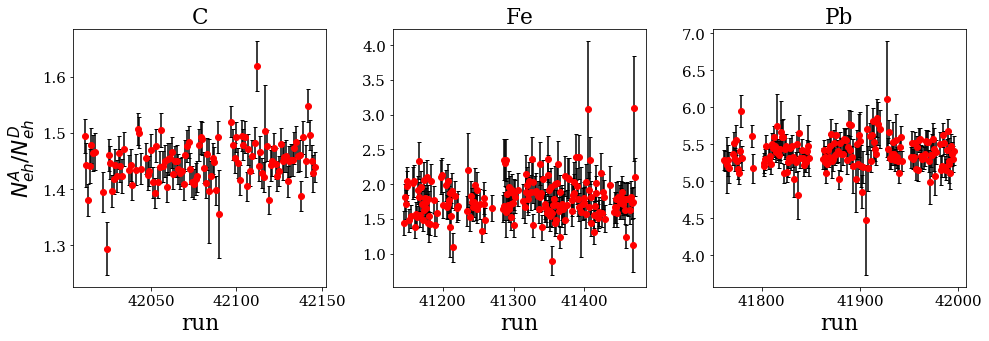

In [350]:
import glob 
import ROOT
fig, axs = plt.subplots(1,3, figsize=(14, 5))
for a,b,ax in zip("C Fe Pb".split(), "ca fe pb".split(),axs):    
    na = {}
    nd = {}
    path = f"/home/seba/di-hadron/data/{b}/*.pass2.root"
    cuts = "abs(pid)==211 && abs(deltaZ)<3 && FidCheckCutEl>0 && Zh>0.5"
    cuts += "&& ((10*3.14/180 < asin(Pz/P) && P>0.2 && pid == 211) || ((25*3.14/180 < asin(Pz/P) && P>0.2 && (P>0.5 || 40*3.14/180 < asin(Pz/P)) && pid == -211))) "
    cuts += "&& Nu>2.3 && Nu<4.2 && Q2>1 && W>2"
    if a != "Fe":
        for fn in glob.glob(path):
            print(fn)
            run = int(fn.split("_")[-2])
            f = ROOT.TFile(fn)
            t = f.Get("ntuple_data")
            if run not in na.keys():
                na[run]=0
                nd[run]=0
            na[run] += t.GetEntries("TargType==1 && "+cuts)
            nd[run] += t.GetEntries("TargType==2 && "+cuts) 
            f.Close()
    if a == "Fe":  #patch with the missing files:
        path = f"/home/sebouh/fe_*half/*.pass2.root"
        runs_unpatched = na.keys()
        for fn in glob.glob(path):
            run = int(fn.split("_")[-2])
            if run in runs_unpatched:
                continue
            #print("patching run ", run)
            f = ROOT.TFile(fn)
            t = f.Get("ntuple_data")
            if run not in na.keys():
                na[run]=0
                nd[run]=0
            na[run] += t.GetEntries("TargType==1 && "+cuts)
            nd[run] += t.GetEntries("TargType==2  && "+cuts) 
            f.Close()
    x = []
    y = []
    dy = []
    
    for r in sorted(list(na.keys())):
        if na[r]<1 or nd[r]<1:
            continue
        if a == 'Fe' and r not in good_runs_Fe:
            continue
        if a == 'C' and r not in good_runs_C:
            continue
        if a == 'Pb' and r not in good_runs_Pb:
            continue
        x.append(r)
        y.append(na[r]/nd[r])
        dy.append(na[r]/nd[r]*np.sqrt(1/na[r]+1/nd[r]))
    y = pd.Series(y)
    dy = pd.Series(dy)
    #print(dy)
    avg= np.mean(y)
    std = np.std(y)
    maxsigma = 0
    for i in range(len(x)):
        sigma = abs(y[i]-avg)/std
        if sigma > maxsigma:
            maxsigma=sigma
        if abs(y[i]-avg)/std>5:
            print(x[i]," is a bad run, nsigma=", (y[i]-avg)/std)
    print("maxsigma", maxsigma)
    plt.sca(ax)
    plt.title(a)
    plt.xlabel("run")
    if a == 'C':
        plt.ylabel("$N^A_{eh}/N^D_{eh}$")
    plt.errorbar(x,y,dy, linestyle='', marker='o', color='r',ecolor='k',capsize=2)
    
plt.tight_layout()
plt.savefig("images/rn_3.png")
plt.show()
        #print(f)

<ErrorbarContainer object of 3 artists>

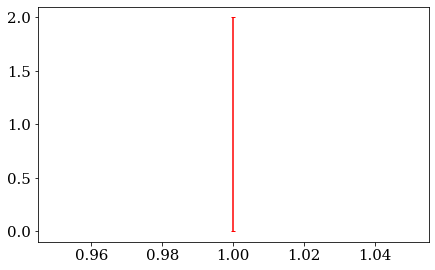

In [349]:
plt.errorbar([1],[1],[1], ecolor='r',capsize=2)
#help(plt.errorbar)

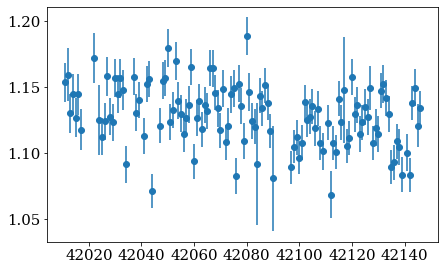

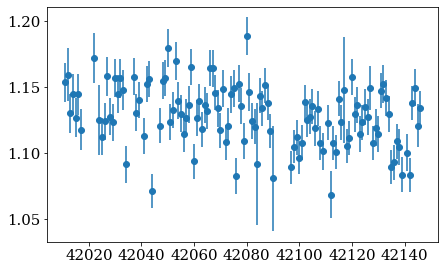

41146  is a bad run
41147  is a bad run
41148  is a bad run
41149  is a bad run
41150  is a bad run
41153  is a bad run
41155  is a bad run
41158  is a bad run
41159  is a bad run
41161  is a bad run
41163  is a bad run
41164  is a bad run
41165  is a bad run
41166  is a bad run
41167  is a bad run
41168  is a bad run
41169  is a bad run
41170  is a bad run
41171  is a bad run
41172  is a bad run
41173  is a bad run
41174  is a bad run
41175  is a bad run
41176  is a bad run
41177  is a bad run
41178  is a bad run
41179  is a bad run
41260  is a bad run
41270  is a bad run
41285  is a bad run
41286  is a bad run
41287  is a bad run
41288  is a bad run
41289  is a bad run
41290  is a bad run
41291  is a bad run
41292  is a bad run
41293  is a bad run
41294  is a bad run
41295  is a bad run
41296  is a bad run
41297  is a bad run
41298  is a bad run
41299  is a bad run
41300  is a bad run
41301  is a bad run
41302  is a bad run
41306  is a bad run
41314  is a bad run
41315  is a bad run


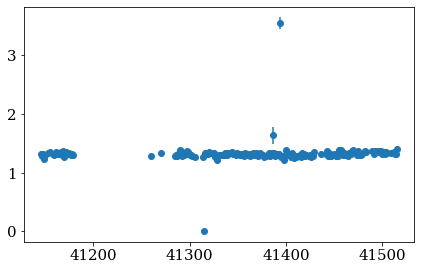

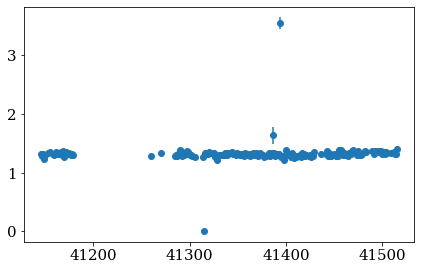

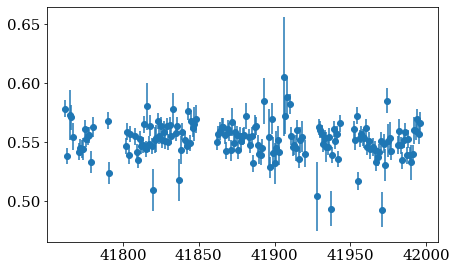

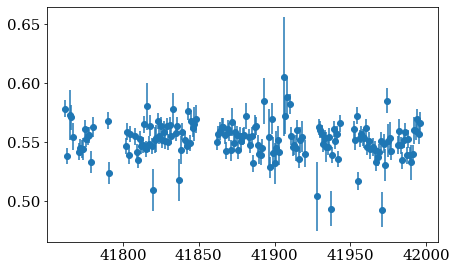

In [227]:
 for a in "C Fe Pb".split():
    dfa = dfs_data[a]
    dfd = dfs_data["D_"+a]
    x = []
    y = []
    dy = []
    for run in sorted(set(dfa.run)):
        na = len(dfa.query(f"run == {run}"))
        nd = len(dfd.query(f"run == {run}"))
        if nd <= 10:
            continue
        x.append(run)
        y.append(na/nd)
        dy.append(na/nd*np.sqrt(1/na+1/nd))
    y = pd.Series(y)
    dy = pd.Series(dy)
    avg = sum(y/dy**2)/sum(1/dy**2)
    for i in range(len(x)):
        if abs(y[i]-avg)/dy[i]>5:
            print(x[i]," is a bad run")
    plt.errorbar(x,y,dy,linestyle='', marker='o')
    plt.show()

In [89]:
import ROOT
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")

for b in list(t.GetListOfBranches()):
    print(b.GetName())

Q2
Nu
Xb
vxe
vye
vze
SectorEl
TargType
Pex
Pey
Pez
Pe
vyec
vzec
NpheEl
FidCheckCutEl
TargTypeSM
TargTypeHH
CCMirrorMatchingEl
SampFractionEl25
SampFractionEl20
W
Zh
Pt2
PhiPQ
ThetaLab
vxh
vyh
vzh
Sector
Px
Py
Pz
P
Betta
pid
T4
deltaZ
Nphe
evnt
FidCheckCutPiPlus
StatCC
Chi2CC
NRowsCC
FidCheckCut
SampFraction25
SampFraction20
CCMirrorMatching
Eh
ThetaPQ
PhiLab
run


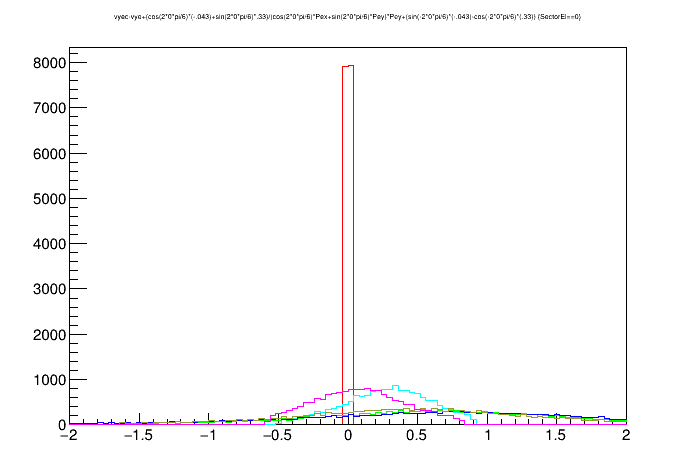

In [189]:
import ROOT
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
c = ROOT.TCanvas()
colors = [ROOT.kRed, ROOT.kCyan, ROOT.kGreen, ROOT.kBlue, ROOT.kYellow-2, ROOT.kMagenta]
for i in range(6):
    
    corrz_calc=f"(cos(2*{i}*pi/6)*(-.043)+sin(2*{i}*pi/6)*.33)/(cos(2*{i}*pi/6)*Pex+sin(2*{i}*pi/6)*Pey)*Pez"
    corry_calc=f"(cos(2*{i}*pi/6)*(-.043)+sin(2*{i}*pi/6)*.33)/(cos(2*{i}*pi/6)*Pex+sin(2*{i}*pi/6)*Pey)*Pey"
    corry_calc+=f"+(sin(-2*{i}*pi/6)*(-.043)-cos(-2*{i}*pi/6)*(.33))"
    #t.Draw(f"vzec-vze+{corrz_calc}>>h{i}(100,-2,2)", f"SectorEl=={i}", "SAME" if i != 0 else "", 100000)
    t.Draw(f"vyec-vye+{corry_calc}>>h{i}(100,-2,2)", f"SectorEl=={i}", "SAME" if i != 0 else "", 100000)
    t.GetHistogram().SetLineColor(colors[i])
    #t.GetHistogram().SetTitle("ZC-Z-corr_calc")
c.Draw()

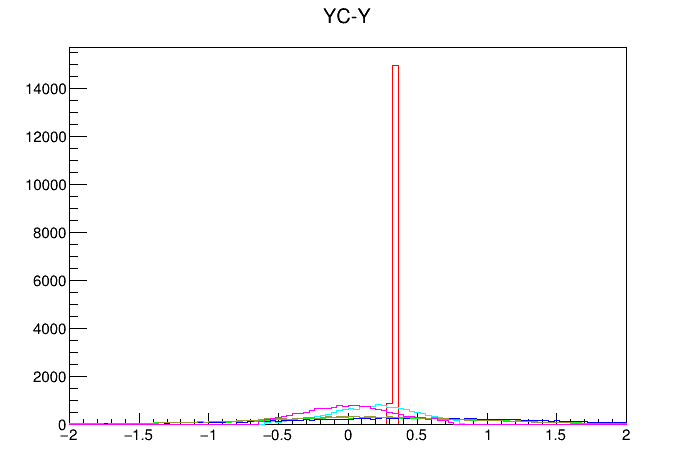

In [132]:
import ROOT
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
c = ROOT.TCanvas()
colors = [ROOT.kRed, ROOT.kCyan, ROOT.kGreen, ROOT.kBlue, ROOT.kYellow-2, ROOT.kMagenta]
for i in range(6):
    t.Draw(f"vyec-vye>>h{i}(100,-2,2)", f"SectorEl=={i}", "SAME" if i != 0 else "", 100000)
    t.GetHistogram().SetLineColor(colors[i])
    t.GetHistogram().SetTitle("YC-Y")
c.Draw()

#for b in list(t.GetListOfBranches()):
#    print(b.GetName())

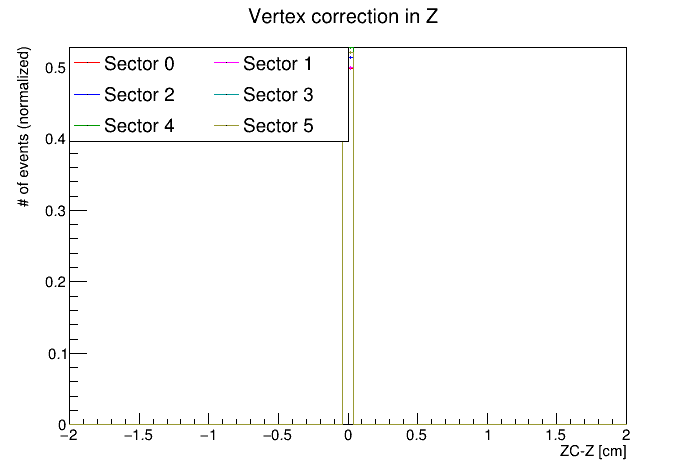

In [148]:
import ROOT
ROOT.gStyle.SetOptStat(0)
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
c = ROOT.TCanvas()
colors = [ROOT.kRed, ROOT.kMagenta, ROOT.kBlue, ROOT.kCyan+2, ROOT.kGreen+2, ROOT.kYellow-2, ]
l = ROOT.TLegend(0.1, 0.7,0.5,.9)
l.SetNColumns(2)
for i in range(6):
    t.Draw(f"vzec-vze+((cos(2*{i}*pi/6)*(-.043)+sin(2*{i}*pi/6)*.33)/(cos(2*{i}*pi/6)*Pex+sin(2*{i}*pi/6)*Pey)*Pez)>>h{i}(100,-2,2)", f"SectorEl=={i}", "SAME" if i != 0 else "", 1000000)
    t.GetHistogram().SetLineColor(colors[i])
    t.GetHistogram().SetTitle("Vertex correction in Z;ZC-Z [cm];# of events (normalized)")
    t.GetHistogram().Scale(1/t.GetHistogram().GetEntries())
    t.GetHistogram().Draw("HIST SAME")
    t.GetHistogram().SetMinimum(0)
    l.AddEntry(t.GetHistogram(),f"Sector {i}")
l.Draw()
c.Draw()

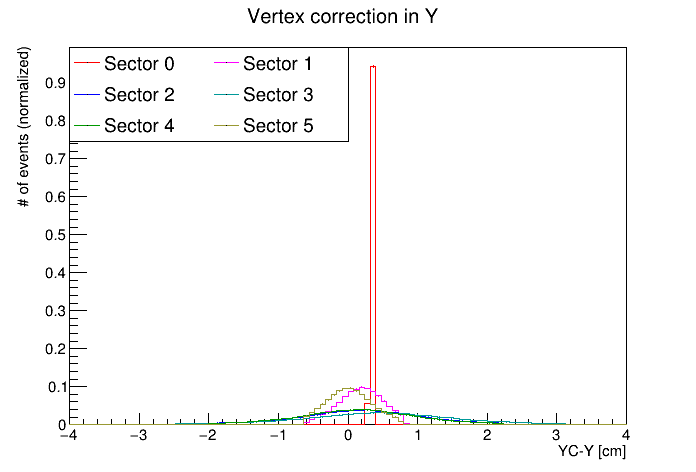

In [176]:
import ROOT
ROOT.gStyle.SetOptStat(0)
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
c = ROOT.TCanvas()
colors = [ROOT.kRed, ROOT.kMagenta, ROOT.kBlue, ROOT.kCyan+2, ROOT.kGreen+2, ROOT.kYellow-2, ]
l = ROOT.TLegend(0.1, 0.7,0.5,.9)
l.SetNColumns(2)
for i in range(6):
    t.Draw(f"vyec-vye>>h{i}(100,-4,4)", f"SectorEl=={i}", "SAME" if i != 0 else "", 1000000)
    t.GetHistogram().SetLineColor(colors[i])
    t.GetHistogram().SetTitle("Vertex correction in Y;YC-Y [cm];# of events (normalized)")
    t.GetHistogram().Scale(1/t.GetHistogram().GetEntries())
    t.GetHistogram().Draw("HIST SAME")
    t.GetHistogram().SetMinimum(0)
    l.AddEntry(t.GetHistogram(),f"Sector {i}")
l.Draw()
c.Draw()

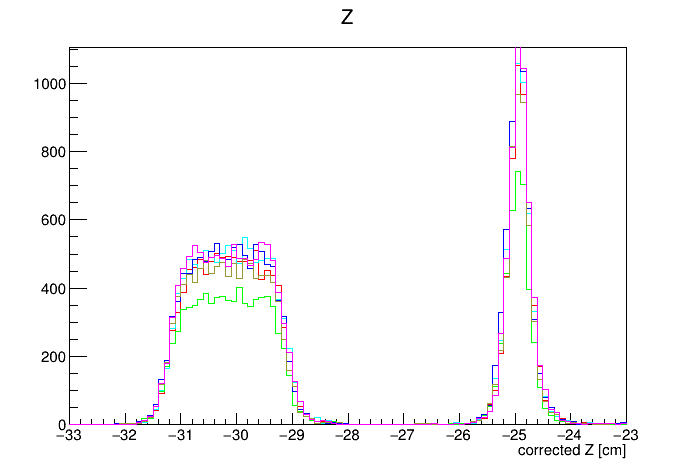

In [154]:
import ROOT
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
c = ROOT.TCanvas()
colors = [ROOT.kRed, ROOT.kCyan, ROOT.kGreen, ROOT.kBlue, ROOT.kYellow-2, ROOT.kMagenta]
for i in range(6):
    t.Draw(f"vzec>>h{i}(100,-33,-23)", f"Sector=={i}", "SAME" if i != 0 else "", 100000)
    t.GetHistogram().SetLineColor(colors[i])
    t.GetHistogram().SetTitle("Z;corrected Z [cm]")
c.Draw()

Info in <TCanvas::Print>: pdf file images/diff_vy.pdf has been created


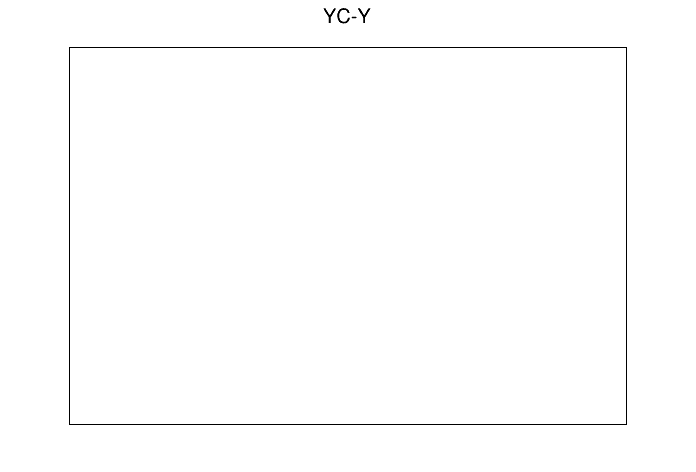

In [105]:
def draw_vertex_plot(formula,title, filename):
    import ROOT
    f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
    t = f.Get("ntuple_data")
    c = ROOT.TCanvas()
    colors = [ROOT.kRed, ROOT.kCyan, ROOT.kGreen, ROOT.kBlue, ROOT.kYellow-2, ROOT.kMagenta]
    for i in range(6):
        t.Draw(f"{formula}>>h{i}(100,-2,2)", f"Sector=={i}", "SAME" if i != 0 else "", 100000)
        t.GetHistogram().SetLineColor(colors[i])
        t.GetHistogram().SetTitle(title)
    c.SaveAs(filename)
    return c
c = draw_vertex_plot("vyec-vye", "YC-Y;Vertex correction in y [cm]", "images/diff_vy.pdf")
c.Draw()

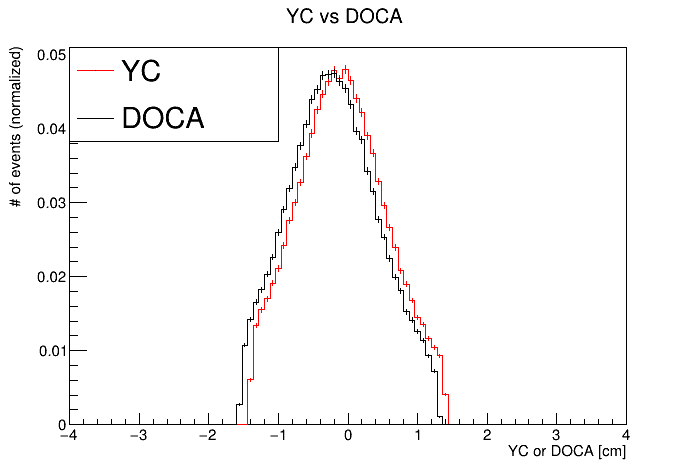

In [196]:
import ROOT
ROOT.gStyle.SetOptStat(0)
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
c = ROOT.TCanvas()
l = ROOT.TLegend(0.1, 0.7,0.4,.9)
t.Draw(f"vyec>>h{i}(100,-4,4)", f"SectorEl=={i}", "", 1000000)
t.GetHistogram().SetLineColor(ROOT.kRed)
t.GetHistogram().SetTitle("YC vs DOCA;YC or DOCA [cm];# of events (normalized)")
t.GetHistogram().Scale(1/t.GetHistogram().GetEntries())
t.GetHistogram().Draw("HIST SAME")
t.GetHistogram().SetMinimum(0)
l.AddEntry(t.GetHistogram(),f"YC")

t.Draw(f"(Pex*vye-Pey*vxe)/sqrt(Pex*Pex+Pey*Pey)>>g(100,-4,4)", f"SectorEl=={i}", "SAME" if i != 0 else "", 1000000)
t.GetHistogram().SetLineColor(ROOT.kBlack)
t.GetHistogram().SetTitle("YC vs DOCA;YC or DOCA [cm];# of events (normalized)")
t.GetHistogram().Scale(1/t.GetHistogram().GetEntries())
t.GetHistogram().Draw("HIST SAME")
t.GetHistogram().SetMinimum(0)
l.AddEntry(t.GetHistogram(),f"DOCA")

l.Draw()
c.Draw()

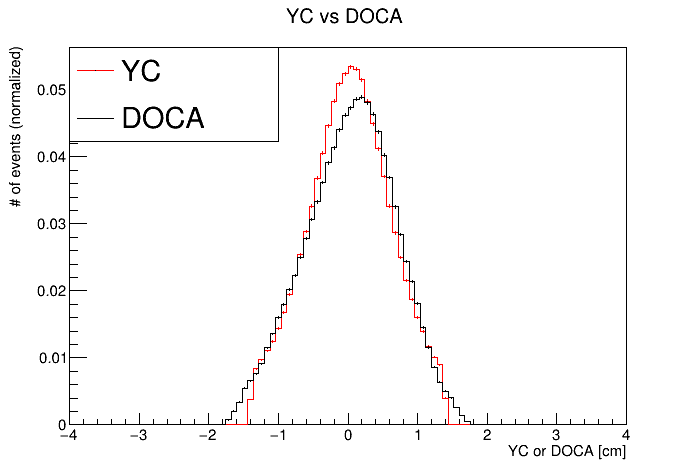

In [383]:
import ROOT
ROOT.gStyle.SetOptStat(0)
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
c = ROOT.TCanvas()
l = ROOT.TLegend(0.1, 0.7,0.4,.9)
t.Draw(f"vyec>>h(100,-4,4)", f"", "", 1000000)
t.GetHistogram().SetLineColor(ROOT.kRed)
t.GetHistogram().SetTitle("YC vs DOCA;YC or DOCA [cm];# of events (normalized)")
t.GetHistogram().Scale(1/t.GetHistogram().GetEntries())
t.GetHistogram().Draw("HIST SAME")
t.GetHistogram().SetMinimum(0)
l.AddEntry(t.GetHistogram(),f"YC")

t.Draw(f"(Pex*vye-Pey*vxe)/sqrt(Pex*Pex+Pey*Pey)>>g(100,-4,4)", f"", "SAME" if i != 0 else "", 1000000)
t.GetHistogram().SetLineColor(ROOT.kBlack)
t.GetHistogram().SetTitle("YC vs DOCA;YC or DOCA [cm];# of events (normalized)")
t.GetHistogram().Scale(1/t.GetHistogram().GetEntries())
t.GetHistogram().Draw("HIST SAME")
t.GetHistogram().SetMinimum(0)
l.AddEntry(t.GetHistogram(),f"DOCA")

l.Draw()
c.Draw()

In [ ]:
import ROOT
ROOT.gStyle.SetOptStat(0)
cut = 1.3

f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
num = t.GetEntries(f"abs(Pex*(vye+.33)-Pey*(vxe-.043))/sqrt(Pex*Pex+Pey*Pey)<{cut}")
denom = t.GetEntries()
print(f"pass doca cut={num}/{denom}={num/denom}")
num2 = t.GetEntries(f"vyec<{cut}")
print(f"pass YC cut={num2}/{denom}={num2/denom}")
print(f"pass YC cut/pass doca cut:{num2/num}")

cut =1.331
num = t.GetEntries(f"abs(Pex*(vye+.33)-Pey*(vxe-.043))/sqrt(Pex*Pex+Pey*Pey)<{cut}")
denom = t.GetEntries()
print(f"pass YC cut(1.3)/pass DOCA cut(1.331):{num2/num}")
doca="abs(Pex*(vye+.33)-Pey*(vxe-.043))/sqrt(Pex*Pex+Pey*Pey)"

In [321]:

for cut2 in 1.293, 1.290, 1.285:
    num3 = t.GetEntries(f"{doca}<{cut2} && abs(vyec)>1.3 || {doca}>{cut2} && abs(vyec)<1.3")
    print("pass one cut but not the other: ",num3/denom, cut2)

pass one cut but not the other:  0.0025443038838578467 1.293
pass one cut but not the other:  0.002592856186965461 1.29
pass one cut but not the other:  0.0029021962999658465 1.285


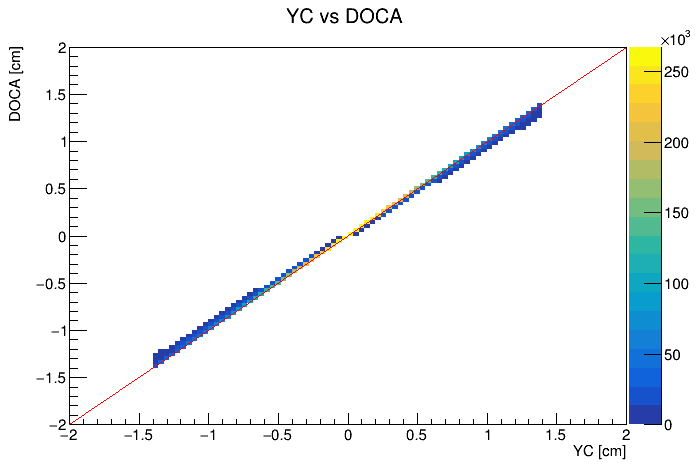

In [376]:
import ROOT
#ROOT.gStyle.SetOptStat(0)
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
c = ROOT.TCanvas()
#t.Draw("vyec")
t.Draw(f"(Pex*(vye+.33)-Pey*(vxe-.043))/sqrt(Pex*Pex+Pey*Pey):vyec>>h(100,-2,2,100,-2,2)", "", "COLZ", 10000000)
t.GetHistogram().SetLineColor(ROOT.kRed)
t.GetHistogram().SetTitle("YC vs DOCA;YC [cm];DOCA [cm]")
l = ROOT.TLine()
l.SetLineColor(ROOT.kRed)
l.SetLineStyle(1)
l.DrawLine(-2,-2, 2,2)

c.Draw()

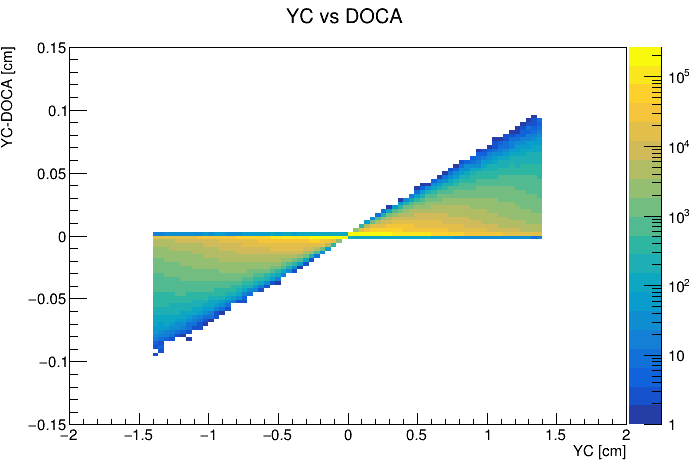

In [381]:
import ROOT
ROOT.gStyle.SetOptStat(0)
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
c = ROOT.TCanvas()
t.Draw(f"vyec-(Pex*(vye+.33)-Pey*(vxe-.043))/sqrt(Pex*Pex+Pey*Pey):vyec>>h(100,-2,2,100,-.15,.15)", f"", "COLZ", 10000000)
t.GetHistogram().SetLineColor(ROOT.kRed)
t.GetHistogram().SetTitle("YC vs DOCA;YC [cm];YC-DOCA [cm]")
#l = ROOT.TLine()
#l.SetLineColor(ROOT.kRed)
#l.SetLineStyle(1)
#l.DrawLine(-2,-2, 2,2)
c.SetLogz()
c.Draw()

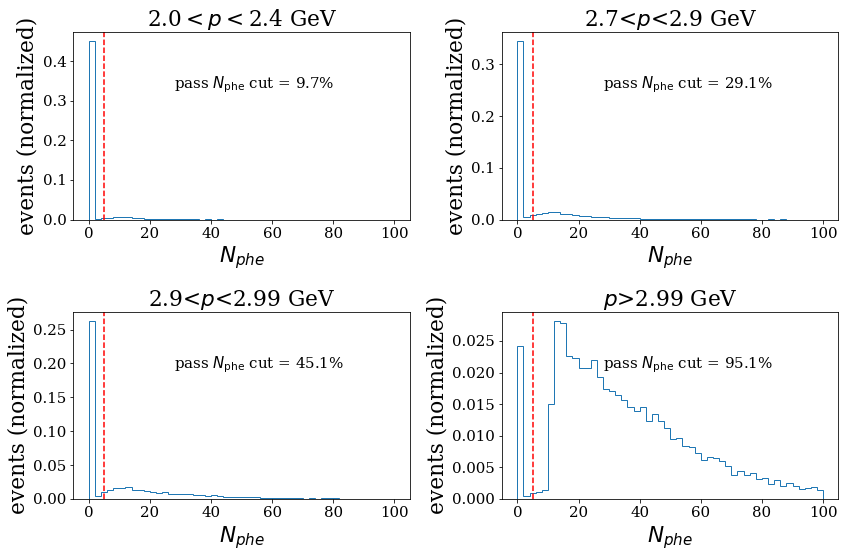

In [411]:
fig,axs = plt.subplots(2,2,figsize=(12,8))
for j,A in enumerate('D'.split()):
    r = ((0,5),(0,500))
    df = dfs_data[A]
    df['h1_p']= df.eval('sqrt((h1_z*nu)**2-.1396**2)')
    #for i,(q,label) in enumerate((("2.0<h1_p<2.2", "2.0$<p<$2.2 GeV"),
    #                ("h1_p>2.7 and h1_p<3.0", "2.7<$p$<3.0 GeV"),
    #                ("h1_p>3.0 and h1_p<3.3", "3.0<$p$<3.3 GeV"),
    #                ("h1_p>3.3", "$p$>3.3 GeV"))):
    for i,(q,label) in enumerate((("2.0<h1_p<2.4", "2.0$<p<$2.4 GeV"),
                    ("h1_p>2.7 and h1_p<2.9", "2.7<$p$<2.9 GeV"),
                    ("h1_p>2.9 and h1_p<2.99", "2.9<$p$<2.99 GeV"),
                    ("h1_p>2.99", "$p$>2.99 GeV"))):
        expr =  "h1_Nphe*(h1_Nphe>0)"
        q = q+" and h1_pid==211"
        plt.sca(axs[i//2][i%2])
        plt.hist(df.query(q).eval(expr),bins=50,range=(0,100), 
             histtype='step', density=True)
        plt.text(0.3,0.7,f"pass $N_{{\\mathrm{{phe}}}}$ cut = {100*len(df.query(q).query('h1_Nphe>5'))/len(df.query(q)):.1f}%",
                transform=plt.gca().transAxes)
        
        plt.gca().set_xlabel("$N_{phe}$")
        plt.gca().set_ylabel("events (normalized)")
        plt.gca().set_title(label)
        #plt.yscale('log')
        plt.gca().axvline(5, color='r', linestyle='--')
        #plt.hist2d(df.h1_p,df.h1_Nphe*(df.h1_Nphe>0), range=r,bins=100, norm = mpl.colors.LogNorm())
plt.tight_layout()
plt.savefig("nphe_2.png")
plt.show()

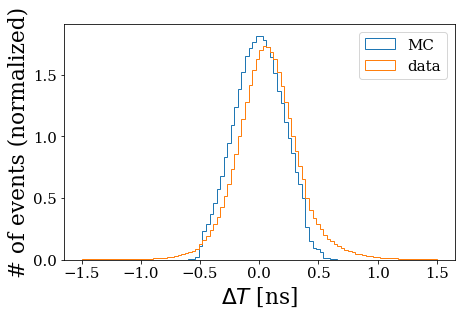

In [296]:
dfs_mc = {a : root_pandas.read_root("../CreatePairTuples/MC_Pairs_weighted_D_2pi.root") for a in "D".split()}

bins=np.linspace(-1.5,1.5, 101)
plt.hist(dfs_mc['D'].h1_T4, histtype='step', label='MC', density=True, bins=bins)
plt.hist(dfs_data['D'].h1_T4, histtype='step', label='data', density=True,bins=bins)
plt.ylabel("# of events (normalized)")
plt.xlabel("$\\Delta T$ [ns]")
plt.legend()
plt.savefig("images/T4_mc.png")

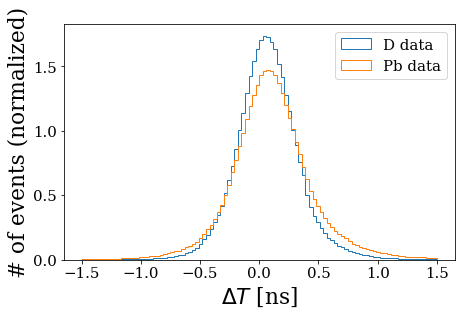

In [386]:
bins=np.linspace(-1.5,1.5, 101)
plt.hist(dfs_data['D_Pb'].h1_T4, histtype='step', label='D data', density=True,bins=bins)
plt.hist(dfs_data['Pb'].h1_T4, histtype='step', label='Pb data', density=True,bins=bins)
plt.ylabel("# of events (normalized)")
plt.xlabel("$\\Delta T$ [ns]")
plt.legend()
plt.Draw
plt.savefig("images/T4_mc.png")

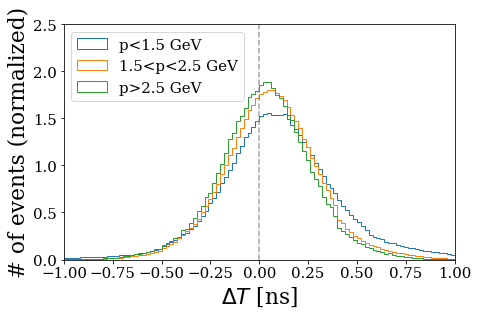

In [405]:
bins=np.linspace(-1.0,1.0, 101)
plt.hist(dfs_data['D_Pb'].query("h1_z*nu<1.5").h1_T4, histtype='step', label='p<1.5 GeV', density=True,bins=bins)
plt.hist(dfs_data['D_Pb'].query("h1_z*nu>1.5 and h1_z*nu<2.5").h1_T4, histtype='step', label='1.5<p<2.5 GeV', density=True,bins=bins)
plt.hist(dfs_data['D_Pb'].query("h1_z*nu>2.5").h1_T4, histtype='step', label='p>2.5 GeV', density=True,bins=bins)
plt.ylabel("# of events (normalized)")
plt.xlabel("$\\Delta T$ [ns]")
plt.legend(loc='upper left')
plt.axvline(0, linestyle='--', color='0.5', alpha=0.7)
plt.xlim(-1,1)
plt.ylim(0,2.5)
#plt.Draw
plt.savefig("images/T4_mc_high_p.png")

In [391]:
print(len(dfs_data['D_Pb'].query("(h1_T4>-.44 and h1_T4<-.5) or (h1_T4>.5 and h1_T4<.56)"))/\
          len(dfs_data["D_Pb"].query("h1_T4>-.5 and h1_T4<.5")))


0.015313024240587685


In [305]:
dfs_data['D'].columns

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py',
       'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20',
       'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th',
       'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector',
       'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus',
       'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC',
       'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'run', 'z_tot',
       'h1_e', 'h1_p', 'h2_e', 'h2_p', 'h1_mass2_TOF', 'h2_mass2_TOF'],
      dtype='object')

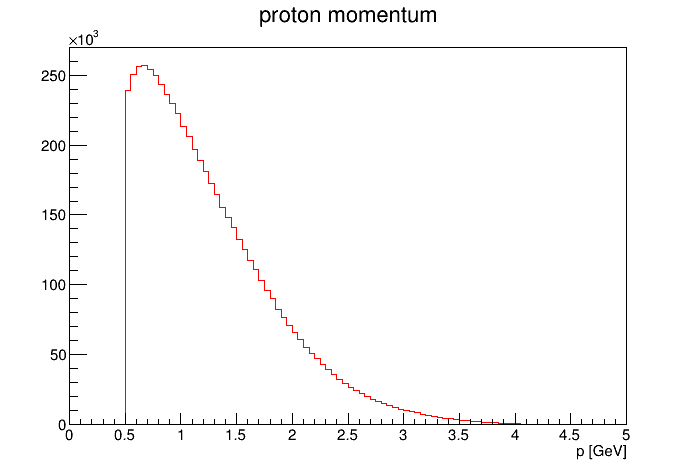

In [360]:
import ROOT
ROOT.gStyle.SetOptStat(0)
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
c = ROOT.TCanvas()
t.Draw(f"P>>h(100,0, 5)", f"pid==2212  && TargType==1")
t.GetHistogram().SetLineColor(ROOT.kRed)
t.GetHistogram().SetTitle("proton momentum;p [GeV];")


c.Draw()

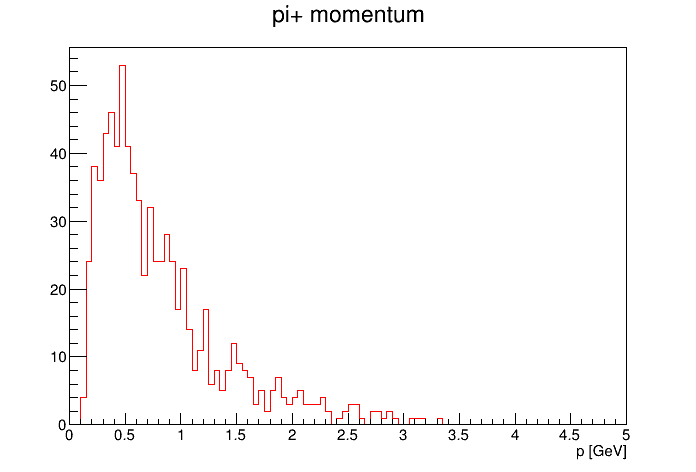

In [359]:
import ROOT
ROOT.gStyle.SetOptStat(0)
f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
t = f.Get("ntuple_data")
c = ROOT.TCanvas()
t.Draw(f"P>>h(100,0, 5)", f"pid==211  && TargType==1","", 10000)
t.GetHistogram().SetLineColor(ROOT.kRed)
t.GetHistogram().SetTitle("pi+ momentum;p [GeV];")
c.Draw()